In [11]:
!pip install torchvision

  Using cached torchvision-0.16.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached torch-2.1.1-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x8

In [2]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

train_set = torchvision.datasets.FashionMNIST(root = ".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
# Fix the seed to be able to get the same randomness across runs 
# and hence reproducible outcomes
torch.manual_seed(0)


# If you are using CuDNN , otherwise you can just ignore
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

Label is: 3
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


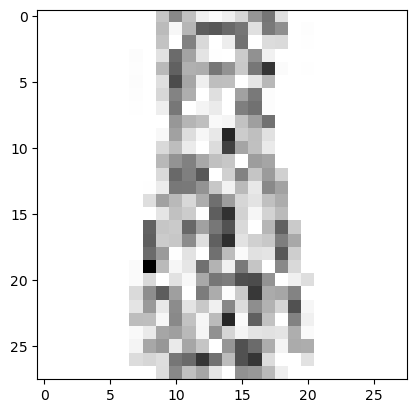

In [3]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

In [4]:
def weights_init(m):
    # initialise both linear and convolutional layers
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)

In [5]:
# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    # TO DO
    self.conv = nn.Conv2d(1, 32, kernel_size = 5, stride = 1)
    self.act_conv = nn.ReLU()
    self.max_pool = nn.MaxPool2d(2, stride=2)

    self.conv1 = nn.Conv2d(32, 64, kernel_size = 5, stride = 1)
    self.act_conv1 = nn.ReLU()
    self.max_pool1 = nn.MaxPool2d(2, stride=2)


    self.fc = nn.Linear(1024, 1024)
    self.act = nn.ReLU()
    self.fc1 = nn.Linear(1024, 256)
    self.act1 = nn.ReLU()
    self.fc2 = nn.Linear(256, 10)


  def forward(self, x):
    # TO DO

    x = self.conv(x)
    x = self.act_conv(x)
    x = self.max_pool(x)

    x = self.conv1(x)
    x = self.act_conv1(x)
    x = self.max_pool1(x)

    x = x.view(x.size(0), -1)

    x = self.fc(x)
    x = self.act(x)
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)

    return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    # TO DO
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader, 0):
    # TO DO
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
    # TO DO
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

Epoch 1: loss: 996.9467280879617, train accuracy: 87.45166666666667, valid accuracy:86.37
Epoch 2: loss: 605.2635951153934, train accuracy: 89.56333333333333, valid accuracy:88.08
Epoch 3: loss: 516.9374495688826, train accuracy: 90.92833333333333, valid accuracy:89.37
Epoch 4: loss: 460.1001621391624, train accuracy: 91.94333333333333, valid accuracy:89.8
Epoch 5: loss: 412.0873581469059, train accuracy: 92.85166666666667, valid accuracy:90.28
Epoch 6: loss: 372.36385826952755, train accuracy: 93.79833333333333, valid accuracy:90.43
Epoch 7: loss: 336.407564913854, train accuracy: 93.76833333333333, valid accuracy:90.53
Epoch 8: loss: 305.9818992651999, train accuracy: 94.15, valid accuracy:89.95
Epoch 9: loss: 274.10319097037427, train accuracy: 95.72833333333334, valid accuracy:91.1
Epoch 10: loss: 245.27625565999188, train accuracy: 95.695, valid accuracy:90.68
Epoch 11: loss: 223.1231038927799, train accuracy: 96.08833333333334, valid accuracy:90.7
Epoch 12: loss: 199.239717839518

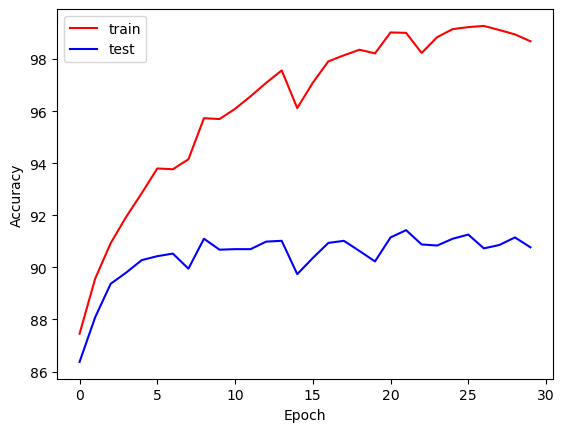

In [6]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracy, "r")
plt.plot(valid_accuracy, "b")
plt.gca().legend(('train','test'))

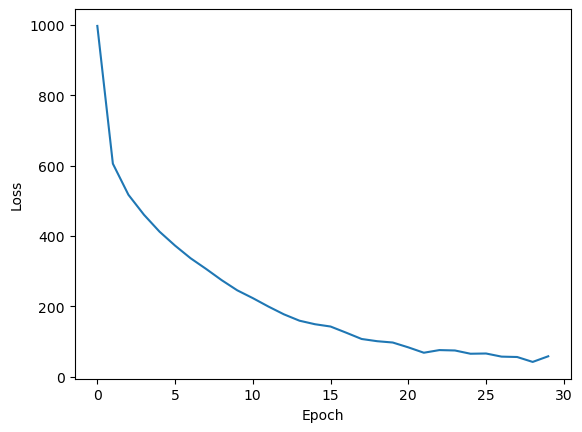

In [7]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_epoch_array)

In [8]:
# CNN implementation

class MyCNN1(nn.Module):
  def __init__(self):
    super(MyCNN1, self).__init__()
    # TO DO
    self.conv = nn.Conv2d(1, 32, kernel_size = 5, stride = 1)
    self.act_conv = nn.ELU()
    self.max_pool = nn.MaxPool2d(2, stride=2)

    self.conv1 = nn.Conv2d(32, 64, kernel_size = 5, stride = 1)
    self.act_conv1 = nn.ELU()
    self.max_pool1 = nn.MaxPool2d(2, stride=2)


    self.fc = nn.Linear(1024, 1024)
    self.act = nn.ELU()
    self.fc1 = nn.Linear(1024, 256)
    self.act1 = nn.ELU()
    self.fc2 = nn.Linear(256, 10)


  def forward(self, x):
    # TO DO

    x = self.conv(x)
    x = self.act_conv(x)
    x = self.max_pool(x)

    x = self.conv1(x)
    x = self.act_conv1(x)
    x = self.max_pool1(x)

    x = x.view(x.size(0), -1)

    x = self.fc(x)
    x = self.act(x)
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)

    return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyCNN1().to(device)
# initialise weights
net.apply(weights_init)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)


def train_data(net, loss_fn, opt):
    loss_epoch_array = []
    max_epochs = 30
    loss_epoch = 0
    train_accuracy = []
    valid_accuracy = []
    for epoch in range(max_epochs):
      loss_epoch = 0
      for i, data in enumerate(train_loader, 0):
        # TO DO
        net.train()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_epoch += loss.item()
        # TO DO
      loss_epoch_array.append(loss_epoch)
      train_accuracy.append(evaluation(train_loader))
      valid_accuracy.append(evaluation(test_loader))
      print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))
    return train_accuracy, valid_accuracy, loss_epoch_array

ELU_ta, ELU_va, ELU_lea = train_data(net, loss_fn, opt)

Epoch 1: loss: 855.4062706455588, train accuracy: 87.57333333333334, valid accuracy:86.59
Epoch 2: loss: 587.1917419694364, train accuracy: 88.12166666666667, valid accuracy:86.46
Epoch 3: loss: 504.5677326582372, train accuracy: 89.94666666666667, valid accuracy:87.77
Epoch 4: loss: 447.296541467309, train accuracy: 92.745, valid accuracy:90.08
Epoch 5: loss: 401.1751262722537, train accuracy: 93.26333333333334, valid accuracy:89.99
Epoch 6: loss: 361.23857493139803, train accuracy: 93.93, valid accuracy:89.77
Epoch 7: loss: 322.68941510561854, train accuracy: 93.87666666666667, valid accuracy:90.02
Epoch 8: loss: 292.1734485011548, train accuracy: 95.57, valid accuracy:90.73
Epoch 9: loss: 259.4662897530943, train accuracy: 95.35666666666667, valid accuracy:89.86
Epoch 10: loss: 233.06988414144143, train accuracy: 95.41833333333334, valid accuracy:89.99
Epoch 11: loss: 211.37570677441545, train accuracy: 96.26, valid accuracy:90.22
Epoch 12: loss: 185.3392127622501, train accuracy: 9

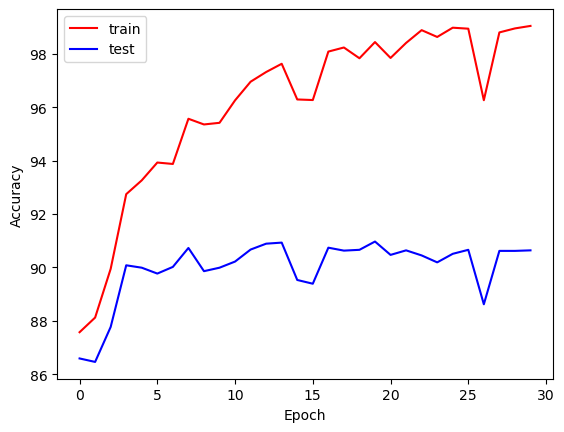

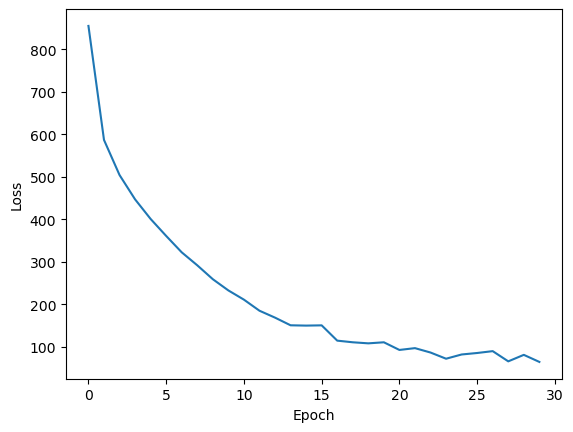

In [9]:
def show_data(train_accuracy, valid_accuracy, loss_epoch_array):
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.plot(train_accuracy, "r")
    plt.plot(valid_accuracy, "b")
    plt.gca().legend(('train','test'))
    plt.show()
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.plot(loss_epoch_array)
    plt.show()

show_data(ELU_ta, ELU_va, ELU_lea)

Epoch 1: loss: 867.1049693673849, train accuracy: 87.37666666666667, valid accuracy:85.79
Epoch 2: loss: 592.4523016717285, train accuracy: 89.97833333333334, valid accuracy:87.99
Epoch 3: loss: 496.45122556202114, train accuracy: 92.07666666666667, valid accuracy:89.48
Epoch 4: loss: 432.5216681212187, train accuracy: 92.62166666666667, valid accuracy:89.88
Epoch 5: loss: 377.1290385443717, train accuracy: 92.855, valid accuracy:89.45
Epoch 6: loss: 335.05119921732694, train accuracy: 94.39333333333333, valid accuracy:90.46
Epoch 7: loss: 290.79405109072104, train accuracy: 94.99166666666666, valid accuracy:90.45
Epoch 8: loss: 253.25466319872066, train accuracy: 96.4, valid accuracy:90.85
Epoch 9: loss: 217.59763605543412, train accuracy: 96.65666666666667, valid accuracy:90.98
Epoch 10: loss: 186.12581187451724, train accuracy: 96.57333333333334, valid accuracy:90.61
Epoch 11: loss: 155.12565322680166, train accuracy: 97.525, valid accuracy:90.7
Epoch 12: loss: 131.06664796901168, t

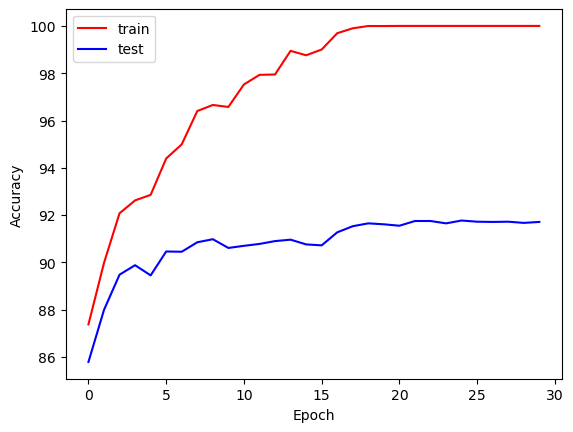

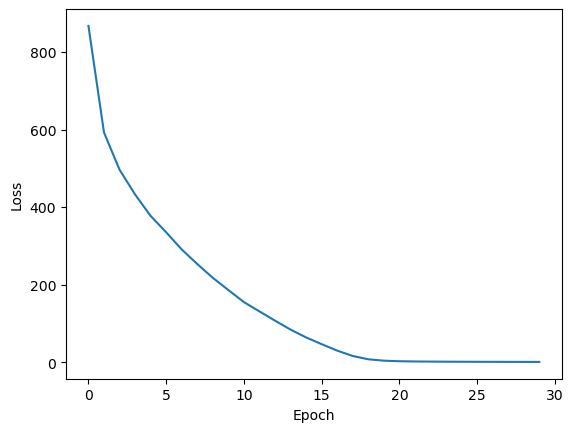

In [14]:
# CNN implementation

class MyCNN2(nn.Module):
  def __init__(self):
    super(MyCNN2, self).__init__()
    # TO DO
    self.conv = nn.Conv2d(1, 32, kernel_size = 5, stride = 1)
    self.act_conv = nn.Tanh()
    self.max_pool = nn.MaxPool2d(2, stride=2)

    self.conv1 = nn.Conv2d(32, 64, kernel_size = 5, stride = 1)
    self.act_conv1 = nn.Tanh()
    self.max_pool1 = nn.MaxPool2d(2, stride=2)


    self.fc = nn.Linear(1024, 1024)
    self.act = nn.Tanh()
    self.fc1 = nn.Linear(1024, 256)
    self.act1 = nn.Tanh()
    self.fc2 = nn.Linear(256, 10)


  def forward(self, x):
    # TO DO

    x = self.conv(x)
    x = self.act_conv(x)
    x = self.max_pool(x)

    x = self.conv1(x)
    x = self.act_conv1(x)
    x = self.max_pool1(x)

    x = x.view(x.size(0), -1)

    x = self.fc(x)
    x = self.act(x)
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)

    return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyCNN2().to(device)
# initialise weights
net.apply(weights_init)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

Tanh_ta, Tanh_va, Tanh_lea = train_data(net, loss_fn, opt)
show_data(Tanh_ta, Tanh_va, Tanh_lea)

Epoch 1: loss: 4341.48725938797, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4319.264187335968, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 3312.778515636921, train accuracy: 58.485, valid accuracy:58.16
Epoch 4: loss: 1531.3283191621304, train accuracy: 70.19, valid accuracy:69.84
Epoch 5: loss: 1279.8218343257904, train accuracy: 73.845, valid accuracy:73.2
Epoch 6: loss: 1158.8047769218683, train accuracy: 78.25333333333333, valid accuracy:77.43
Epoch 7: loss: 1060.3427660614252, train accuracy: 79.75666666666666, valid accuracy:78.42
Epoch 8: loss: 980.0322831869125, train accuracy: 78.85, valid accuracy:77.66
Epoch 9: loss: 915.8823561370373, train accuracy: 81.95, valid accuracy:80.81
Epoch 10: loss: 862.2890609949827, train accuracy: 82.64333333333333, valid accuracy:81.83
Epoch 11: loss: 818.216062605381, train accuracy: 84.89, valid accuracy:83.96
Epoch 12: loss: 780.7026767209172, train accuracy: 85.01666666666667, valid accuracy:84.08
Epoch 13: loss

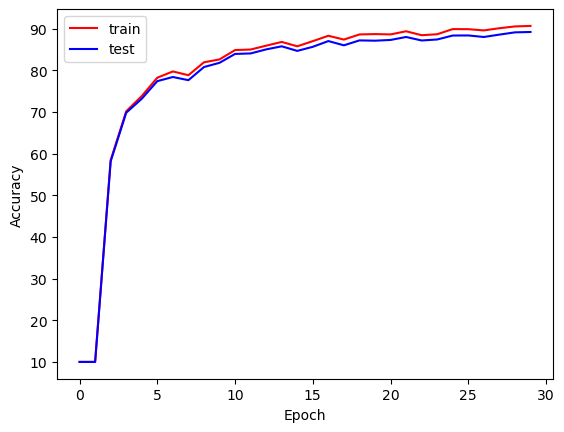

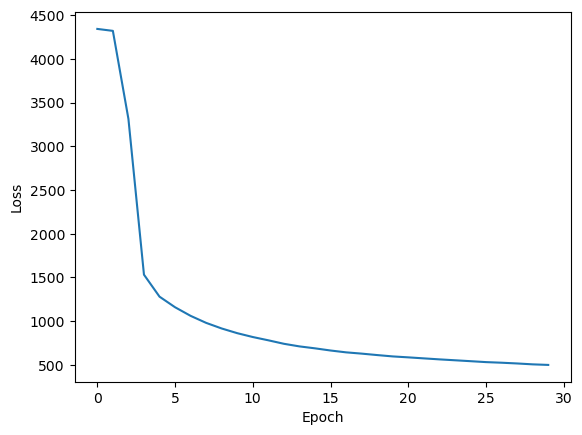

In [10]:
# CNN implementation

class MyCNN3(nn.Module):
  def __init__(self):
    super(MyCNN3, self).__init__()
    # TO DO
    self.conv = nn.Conv2d(1, 32, kernel_size = 5, stride = 1)
    self.act_conv = nn.Sigmoid()
    self.max_pool = nn.MaxPool2d(2, stride=2)

    self.conv1 = nn.Conv2d(32, 64, kernel_size = 5, stride = 1)
    self.act_conv1 = nn.Sigmoid()
    self.max_pool1 = nn.MaxPool2d(2, stride=2)


    self.fc = nn.Linear(1024, 1024)
    self.act = nn.Sigmoid()
    self.fc1 = nn.Linear(1024, 256)
    self.act1 = nn.Sigmoid()
    self.fc2 = nn.Linear(256, 10)


  def forward(self, x):
    # TO DO

    x = self.conv(x)
    x = self.act_conv(x)
    x = self.max_pool(x)

    x = self.conv1(x)
    x = self.act_conv1(x)
    x = self.max_pool1(x)

    x = x.view(x.size(0), -1)

    x = self.fc(x)
    x = self.act(x)
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)

    return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyCNN3().to(device)
# initialise weights
net.apply(weights_init)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

Sigmoid_ta, Sigmoid_va, Sigmoid_lea = train_data(net, loss_fn, opt)
show_data(Sigmoid_ta, Sigmoid_va, Sigmoid_lea)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Learning Rate = 0.001
Epoch 1: loss: 3334.1858198046684, train accuracy: 68.485, valid accuracy:67.83
Epoch 2: loss: 1534.0144747495651, train accuracy: 72.67166666666667, valid accuracy:71.92
Epoch 3: loss: 1343.9835646152496, train accuracy: 73.83333333333333, valid accuracy:73.1
Epoch 4: loss: 1246.8916119635105, train accuracy: 73.64333333333333, valid accuracy:72.44
Epoch 5: loss: 1182.270620405674, train accuracy: 76.76166666666667, valid accuracy:76.01
Epoch 6: loss: 1126.7576612234116, train accuracy: 78.10833333333333, valid accuracy:77.09
Epoch 7: loss: 1079.7956066578627, train accuracy: 78.20666666666666, valid accuracy:77.27
Epoch 8: loss: 1040.8283661305904, train accuracy: 79.895, valid accuracy:78.69
Epoch 9: loss: 1004.539317831397, train accuracy: 81.50666666666666, valid accuracy:80.21
Epoch 10: loss: 969.31689915061, train accuracy: 81.46333333333334, valid accuracy:80.18
Epoch 11: loss: 941.4067519009113, train accuracy: 

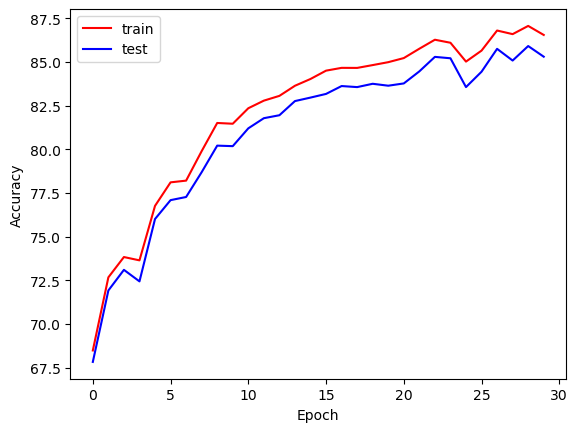

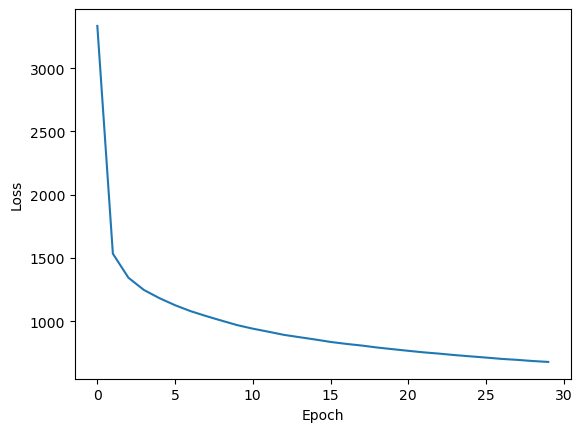

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Learning Rate = 0.1
Epoch 1: loss: 989.8526604920626, train accuracy: 86.32166666666667, valid accuracy:85.56
Epoch 2: loss: 608.3406595811248, train accuracy: 89.28333333333333, valid accuracy:87.92
Epoch 3: loss: 521.257641762495, train accuracy: 91.06666666666666, valid accuracy:89.2
Epoch 4: loss: 459.17063997127116, train accuracy: 90.655, valid accuracy:88.31
Epoch 5: loss: 413.5533907003701, train accuracy: 92.98, valid accuracy:90.27
Epoch 6: loss: 374.0202935207635, train accuracy: 93.24166666666666, valid accuracy:90.15
Epoch 7: loss: 337.5555291059427, train accuracy: 93.345, valid accuracy:90.22
Epoch 8: loss: 307.0005332240835, train accuracy: 94.82, valid accuracy:90.62
Epoch 9: loss: 271.1753015946597, train accuracy: 95.05, valid accuracy:90.47
Epoch 10: loss: 243.84549169032834, train accuracy: 96.28666666666666, valid accuracy:90.81
Epoch 11: loss: 225.21185683528893, train accuracy: 96.76833333333333, valid accuracy:90.92
E

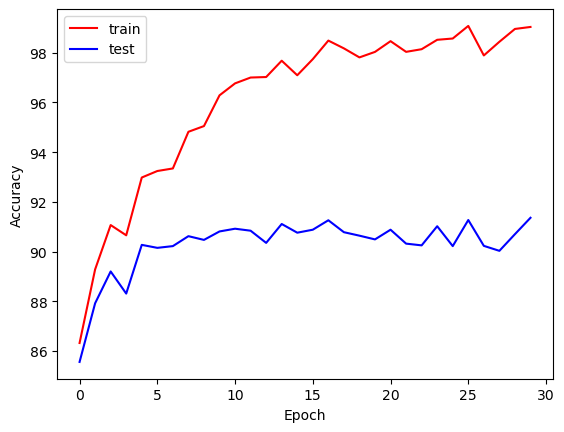

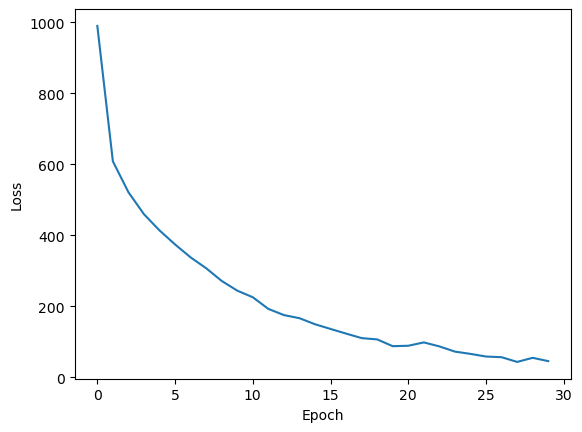

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Learning Rate = 0.5
Epoch 1: loss: 1285.0056131407619, train accuracy: 82.24166666666666, valid accuracy:80.93
Epoch 2: loss: 804.5850699916482, train accuracy: 85.765, valid accuracy:84.25
Epoch 3: loss: 716.90590339154, train accuracy: 86.96, valid accuracy:85.3
Epoch 4: loss: 660.1502553746104, train accuracy: 87.16333333333333, valid accuracy:85.11
Epoch 5: loss: 615.8950691968203, train accuracy: 89.14166666666667, valid accuracy:86.8
Epoch 6: loss: 592.1861595623195, train accuracy: 89.335, valid accuracy:86.58
Epoch 7: loss: 567.659072836861, train accuracy: 90.08166666666666, valid accuracy:86.95
Epoch 8: loss: 542.6561615448445, train accuracy: 90.20166666666667, valid accuracy:87.24
Epoch 9: loss: 517.4051558095962, train accuracy: 89.685, valid accuracy:86.23
Epoch 10: loss: 514.4067842233926, train accuracy: 88.26, valid accuracy:84.75
Epoch 11: loss: 613.4932362791151, train accuracy: 88.435, valid accuracy:85.65
Epoch 12: loss: 

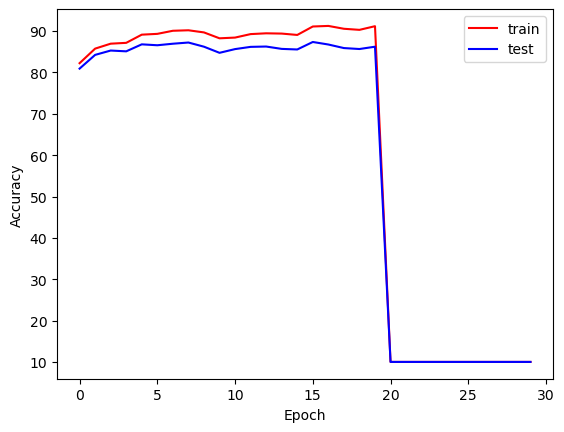

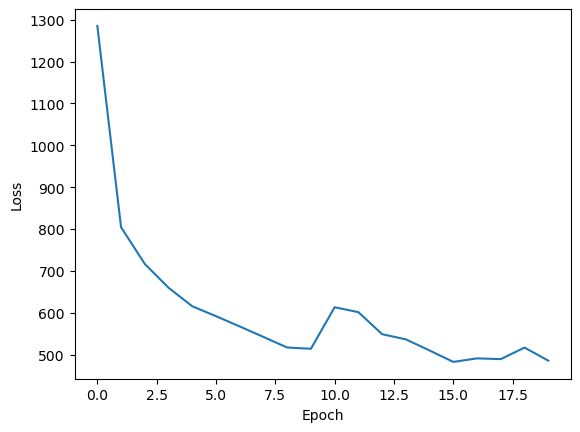

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Learning Rate = 1
Epoch 1: loss: 4331.326722502708, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4330.829228639603, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 4331.858069896698, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: 4331.453258275986, train accuracy: 10.0, valid accuracy:10.0
Epoch 5: loss: 4331.864670276642, train accuracy: 10.0, valid accuracy:10.0
Epoch 6: loss: 4330.80063867569, train accuracy: 10.0, valid accuracy:10.0
Epoch 7: loss: 4330.713332653046, train accuracy: 10.0, valid accuracy:10.0
Epoch 8: loss: 4331.5535435676575, train accuracy: 10.0, valid accuracy:10.0
Epoch 9: loss: 4330.549383401871, train accuracy: 10.0, valid accuracy:10.0
Epoch 10: loss: 4330.509214401245, train accuracy: 10.0, valid accuracy:10.0
Epoch 11: loss: 4331.507647275925, train accuracy: 10.0, valid accuracy:10.0
Epoch 12: loss: 4330.526267051697, train accuracy: 10.0, valid accuracy:10.0
Epoch 13: loss: 4330.92

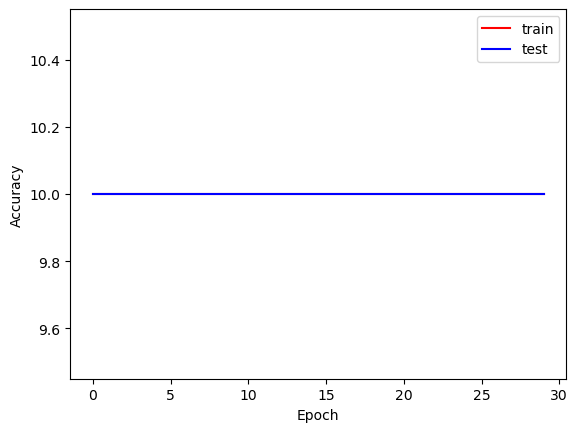

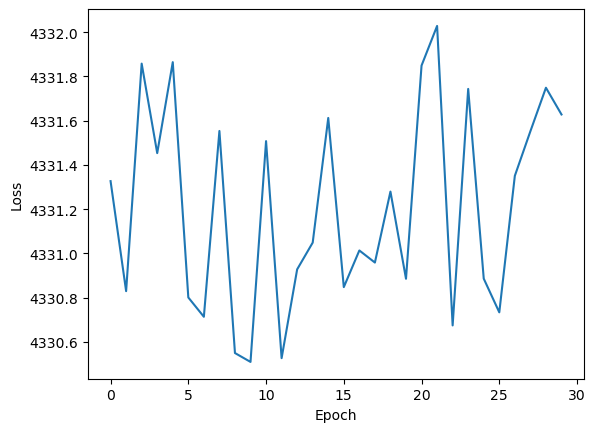

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Learning Rate = 10
Epoch 1: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 5: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 6: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 7: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 8: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 9: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 10: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 11: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 12: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 13: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 14: loss: nan, train accuracy: 10.0, valid accuracy:10.0
Epoch 15: loss: nan, train accuracy: 10.0, valid accuracy:10.0
E

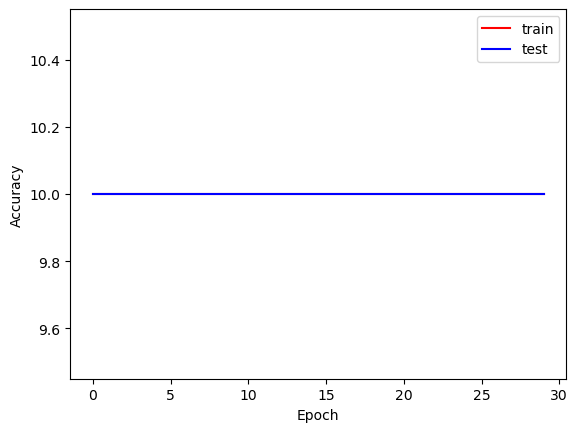

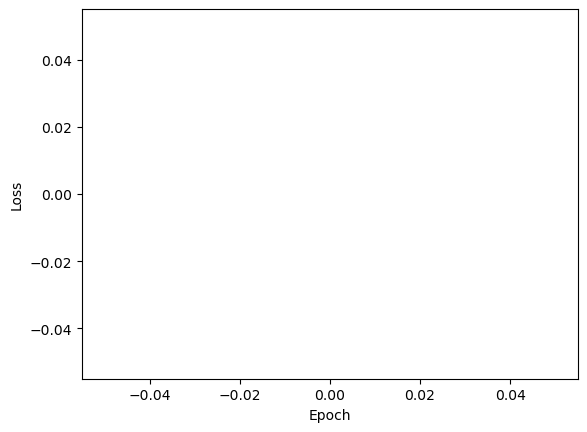

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
rates = [0.001, 0.1, 0.5, 1, 10]
for lr in rates:
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(f"Learning Rate = {lr}")
    net = MyCNN().to(device)
    # initialise weights
    net.apply(weights_init)
    
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.SGD(list(net.parameters()), lr)
    ta, va, lea = train_data(net, loss_fn, opt)
    show_data(ta, va, lea)
    

Epoch 1: loss: 985.5299638882279, train accuracy: 87.76833333333333, valid accuracy:86.68
Epoch 2: loss: 611.3923392444849, train accuracy: 86.41666666666667, valid accuracy:85.32
Epoch 3: loss: 523.8623634278774, train accuracy: 91.27666666666667, valid accuracy:89.31
Epoch 4: loss: 465.8093632161617, train accuracy: 91.64166666666667, valid accuracy:89.36
Epoch 5: loss: 414.33709276933223, train accuracy: 93.23, valid accuracy:90.28
Epoch 6: loss: 371.9368467605673, train accuracy: 93.09, valid accuracy:89.77
Epoch 7: loss: 334.19772082939744, train accuracy: 94.585, valid accuracy:90.65
Epoch 8: loss: 302.2414115332067, train accuracy: 94.82333333333334, valid accuracy:90.6
Epoch 9: loss: 274.13778078812174, train accuracy: 95.07666666666667, valid accuracy:90.36
Epoch 10: loss: 248.67158926744014, train accuracy: 96.2, valid accuracy:90.77
Epoch 11: loss: 216.8090146286413, train accuracy: 96.32833333333333, valid accuracy:90.94
Epoch 12: loss: 197.2331203359645, train accuracy: 96

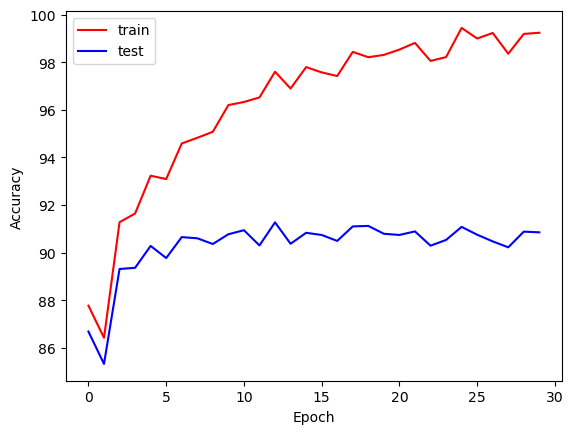

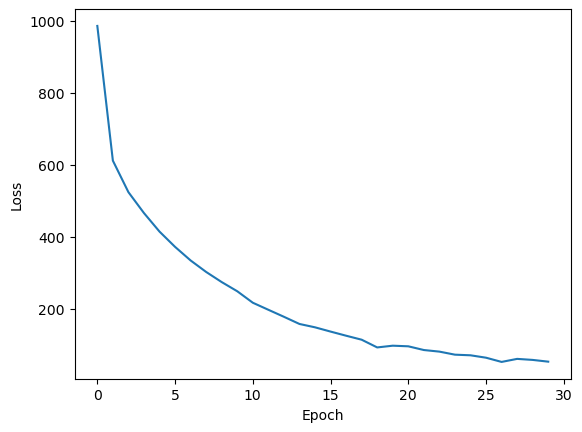

In [17]:
class MyCNN4(nn.Module):
  def __init__(self): 
    super(MyCNN4, self).__init__()
    # TO DO
    self.conv = nn.Conv2d(1, 32, kernel_size = 5, stride = 1)
    self.act_conv = nn.ReLU()
    self.max_pool = nn.MaxPool2d(2, stride=2)

    self.conv1 = nn.Conv2d(32, 64, kernel_size = 5, stride = 1)
    self.act_conv1 = nn.ReLU()
    self.max_pool1 = nn.MaxPool2d(2, stride=2)


    self.fc = nn.Linear(1024, 1024)
    self.act = nn.ReLU()
    self.fc1 = nn.Linear(1024, 256)
    self.act1 = nn.ReLU()
    self.fc2 = nn.Linear(256, 10)
    self.dropout = nn.Dropout(p=0.3)


  def forward(self, x):
    # TO DO

    x = self.conv(x)
    x = self.act_conv(x)
    x = self.max_pool(x)

    x = self.conv1(x)
    x = self.act_conv1(x)
    x = self.max_pool1(x)

    x = x.view(x.size(0), -1)

    x = self.fc(x)
    x = self.act(x)
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)

    return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyCNN4().to(device)
# initialise weights
net.apply(weights_init)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)
DO_ta, DO_va, DO_lea = train_data(net, loss_fn, opt)
show_data(DO_ta, DO_va, DO_lea)